In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [12]:
data=pd.read_csv('gold_price_data.csv')

In [13]:
data.shape

(2290, 6)

In [7]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
corre=data.corr()

<AxesSubplot:>

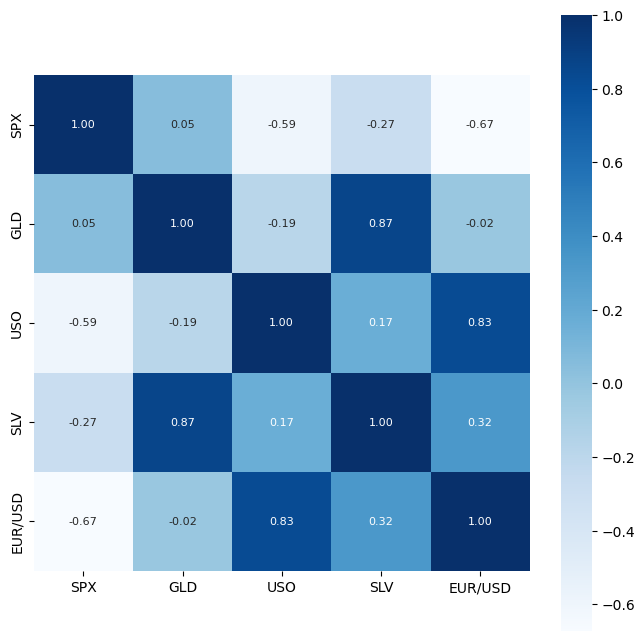

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(corre,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [19]:
corre

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

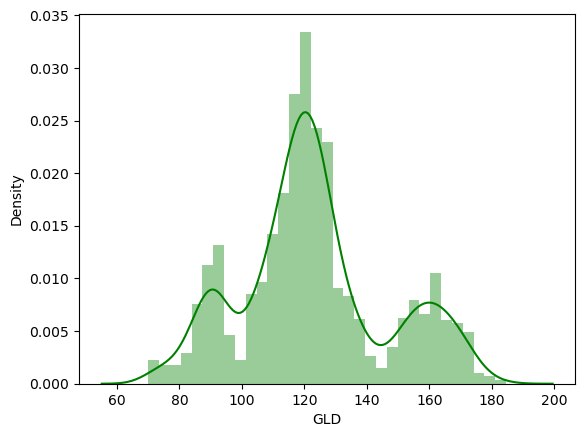

In [20]:
sns.distplot(data['GLD'],color='green')

In [25]:
x=data.drop(['Date','GLD'],axis=1)

In [26]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [27]:
y=data['GLD']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [32]:
regressor=RandomForestRegressor(n_estimators=100)

In [33]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
# prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [36]:
test_data_prediction

array([122.24299972, 129.91610294, 127.55659979,  96.71829748,
       118.79050042, 114.3222992 , 124.63390108, 117.69129919,
       108.05200116,  98.26149953,  95.81479967, 167.62299841,
       148.66960095, 116.12880037, 170.77960223,  85.15469984,
       123.37999865, 109.23449706, 113.15050074, 131.86030176,
       124.34759895, 113.6552007 , 115.77020087, 108.58899964,
       108.6494015 , 125.8164991 , 118.97889947, 112.4219995 ,
       113.39780168, 125.478099  , 145.9915014 ,  89.41479967,
       167.10909963, 113.22089977, 108.43460099, 120.2379014 ,
       142.32569869, 161.09540152, 173.75469793, 153.20430137,
       119.57510115, 113.05060117, 121.44379914, 113.75819914,
       122.1757003 , 107.97400063,  88.65419902, 114.61909916,
       130.04420243, 117.76420095, 103.9432003 , 130.15910255,
       107.0058986 , 160.7254046 , 131.71840075, 117.98669974,
       147.37510095, 137.16920201,  95.49180124, 124.62190153,
       115.11099855,  85.97190042, 104.3192993 , 113.95

In [38]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9900177556163927


Compare the Actual Values and Predicted Values in a Plot

In [40]:
Y_test = list(y_test)

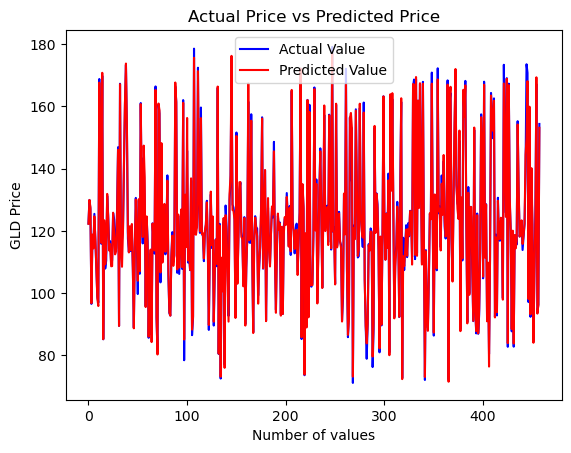

In [43]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()